In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#This is the chipotle dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
#The number of enries in the dataset
chipo.shape[0]

4622

In [6]:
#Another possible solution to the previous question is 
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [7]:
#The number of columns in the dataset
chipo.shape[1]

5

In [8]:
#The names of all the columns in the dataset
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [18]:
#Most ordered item 
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending= False)
print(c.head(10))

                              order_id  quantity
item_name                                       
Chicken Bowl                    713926       761
Chicken Burrito                 497303       591
Chips and Guacamole             449959       506
Steak Burrito                   328437       386
Canned Soft Drink               304753       351
Chips                           208004       230
Steak Bowl                      193752       221
Bottled Water                   175944       211
Chips and Fresh Tomato Salsa    100419       130
Canned Soda                      76396       126


In [15]:
#Most ordered item in the choice_description
ch = chipo.groupby(['choice_description']).sum()
ch = ch.sort_values(['quantity'], ascending = False)
ch.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [20]:
#Total number of items ordered
total_items = chipo.quantity.sum()
print(total_items)

4972


In [33]:
#Turn the item price into float
chipo.item_price.dtype
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)
chipo.item_price.dtype

TypeError: 'float' object is not subscriptable

In [34]:
chipo.item_price.dtype

dtype('float64')

In [38]:
#Total revenue that was generated
revenue = (chipo['quantity']*chipo['item_price']).sum()
print('revenue was $' + str(np.round(revenue, 2)))

revenue was $39237.02


In [43]:
#Total number of orders that were placed
orders = chipo['order_id'].value_counts().count()
orders

1834

In [49]:
#Average revenue generated per order
chipo['revenue'] = (chipo['quantity']*chipo['item_price'])
orders_grouped = chipo.groupby(by = ['order_id']).sum()
orders_grouped.mean()['revenue']

21.394231188658654

In [50]:
#Numenr of items that were sold
chipo.item_name.value_counts().count()

50

We will now be moving onto the next dataset for pandas practice

In [52]:
#The following is the URL for the Occupation Dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, index_col = 'user_id', sep='|')
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [53]:
#The last 10 entries
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


In [54]:
#Number of observations in the dataset
users.shape[0]

943

In [55]:
#number of columns in the dataset
users.shape[1]

4

In [56]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [57]:
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [61]:
users['occupation'].head(10)

user_id
1        technician
2             other
3            writer
4        technician
5             other
6         executive
7     administrator
8     administrator
9           student
10           lawyer
Name: occupation, dtype: object

In [62]:
users['occupation'].value_counts().count()

21

In [69]:
users['occupation'].value_counts().head(5)

student          196
other            105
educator          95
administrator     79
engineer          67
Name: occupation, dtype: int64

In [70]:
#Desccribing the dataframe
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [71]:
#Summarizing all the columns
users.describe(include = 'all') #Only the numeric columns have been returned.

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [72]:
#Summarizing only the occupation column
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

In [74]:
round(users.age.mean(), 2)

34.05

In [76]:
users.age.value_counts().tail()

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

In this 3rd implementation of learning pandas we will be learning with the World Food Facts Dataset available from Kaggle

In [81]:
food = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')
food.head(5)

C:\Users\Ganesh m\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#Number of observations in the dataset
food.shape[0]

356027

In [83]:
#Number of columns in the dataset
food.shape[1]

163

In [84]:
food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [86]:
food.columns[104]

'-glucose_100g'

In [95]:
name = food.columns[104]
food.dtypes[name]

dtype('float64')

In [96]:
food.index

RangeIndex(start=0, stop=356027, step=1)

In [97]:
#Product Name of the 19th observation
food.values[18][7]

'Lotus Organic Brown Jasmine Rice'

We will now be moving onto filtering and sorting using the Chipotle Dataset

In [98]:
#This is the chipotle dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [99]:
# clean the item_price column and transform it in a float
prices = [float(value[1 : -1]) for value in chipo.item_price]

# reassign the column with the cleaned prices
chipo.item_price = prices

# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]

chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()

12

In [100]:
#Sort by item name
chipo.sort_values(by='item_name')

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49


In [108]:
#Printing the quantity of the item with the highest price
chipo_highest = chipo.sort_values(by = 'item_price', ascending=False).head(1)
chipo_highest['quantity']

3598    15
Name: quantity, dtype: int64

In [111]:
ordered = chipo[chipo.item_name=='Veggie Salad Bowl']
len(ordered)

18

In [114]:
selected = chipo[(chipo.item_name=='Canned Soda') & (chipo.quantity>1)]
len(selected)

20

In [113]:
chipo.groupby('item_name').sum()

,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40
Barbacoa Soft Tacos,18725,25,250.46
Bottled Water,175944,211,302.56
Bowl,472,4,29.60
Burrito,1550,6,44.40


We will now be Moving onto the next dataset i.e. the EUro 12 dataset

In [118]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [121]:
goal_column = euro12.Goals
goal_column

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [123]:
num_teams = euro12.groupby('Team').sum()
len(num_teams)

16

In [128]:
discipline = euro12.iloc[:, np.r_[0, 30:32]]
discipline.head(2)

,Team,Shots off target,Yellow Cards,Red Cards
0,Croatia,12,9,0
1,Czech Republic,18,7,0


In [125]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [136]:
team_grouped = discipline.groupby('Team').sum()
team_grouped['team_grouped_mean'] = [int(value/2) for value in team_grouped['Yellow Cards']]
team_grouped['team_grouped_mean']

Team
Croatia                4
Czech Republic         3
Denmark                2
England                2
France                 3
Germany                2
Greece                 4
Italy                  8
Netherlands            2
Poland                 3
Portugal               6
Republic of Ireland    3
Russia                 3
Spain                  5
Sweden                 3
Ukraine                2
Name: team_grouped_mean, dtype: int64

We will now be moving onto the thrid dataset

In [140]:
#This is the dictionary that has to be converted into a dataframe
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [144]:
army = pd.DataFrame.from_dict(raw_data, 'columns')
army.head(12)

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


In [155]:
index = army.iloc[:, 9:10]
army =  army.DataFrame(army, index= index)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [154]:
index

origin
Arizona       NaN
California    NaN
Texas         NaN
Florida       NaN
Maine         NaN
Iowa          NaN
Alaska        NaN
Washington    NaN
Oregon        NaN
Wyoming       NaN
Louisana      NaN
Georgia       NaN
Name: origin, dtype: object

We will mow be moving onto the student alcohol consumption dataset

In [3]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(url)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
df1 = df.iloc[:, 0:12]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
school      395 non-null object
sex         395 non-null object
age         395 non-null int64
address     395 non-null object
famsize     395 non-null object
Pstatus     395 non-null object
Medu        395 non-null int64
Fedu        395 non-null int64
Mjob        395 non-null object
Fjob        395 non-null object
reason      395 non-null object
guardian    395 non-null object
dtypes: int64(3), object(9)
memory usage: 37.1+ KB


In [6]:
#Lambda function to capitalize the strings
Capitalize = lambda x: x.capitalize()

In [7]:
#we will now apply the capitalize function to Mjob and Fjob to capitalize their values
df1['Mjob'].apply(Capitalize)
df1['Fjob'].apply(Capitalize)

0       Teacher
1         Other
2         Other
3      Services
4         Other
5         Other
6         Other
7       Teacher
8         Other
9         Other
10       Health
11        Other
12     Services
13        Other
14        Other
15        Other
16     Services
17        Other
18     Services
19        Other
20        Other
21       Health
22        Other
23        Other
24       Health
25     Services
26        Other
27     Services
28        Other
29      Teacher
         ...   
365       Other
366    Services
367    Services
368    Services
369     Teacher
370    Services
371    Services
372     At_home
373       Other
374       Other
375       Other
376       Other
377    Services
378       Other
379       Other
380     Teacher
381       Other
382    Services
383    Services
384       Other
385       Other
386     At_home
387       Other
388    Services
389       Other
390    Services
391    Services
392       Other
393       Other
394     At_home
Name: Fjob, Length: 395,

In [8]:
#Printing the last few elements of the dataset
df1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father


The reason why the datframe is still not changed is because we havent assigned it to the dataframe itself thats why

In [9]:
df1['Mjob'] = df1['Mjob'].apply(Capitalize)
df1['Fjob'] = df1['Fjob'].apply(Capitalize)
df1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,Services,Services,course,other
391,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother
392,MS,M,21,R,GT3,T,1,1,Other,Other,course,other
393,MS,M,18,R,LE3,T,3,2,Services,Other,course,mother
394,MS,M,19,U,LE3,T,1,1,Other,At_home,course,father


In [15]:
#Function to determine if the person is of legal age to drink or not
def majority(x):
    if x > 17:
        return True
    else:
        return False

In [16]:
df1['legal_drinker'] = df1['age'].apply(majority)
df1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False
5,GP,M,16,U,LE3,T,4,3,Services,Other,reputation,mother,False
6,GP,M,16,U,LE3,T,2,2,Other,Other,home,mother,False
7,GP,F,17,U,GT3,A,4,4,Other,Teacher,home,mother,False
8,GP,M,15,U,LE3,A,3,2,Services,Other,home,mother,False
9,GP,M,15,U,GT3,T,3,4,Other,Other,home,mother,False


In [19]:
#Function to multiply every number by 10
def time10(x):
    if type(x) is int:
        x = x*10
    return x

In [20]:
df1.applymap(time10).head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
5,GP,M,160,U,LE3,T,40,30,Services,Other,reputation,mother,False
6,GP,M,160,U,LE3,T,20,20,Other,Other,home,mother,False
7,GP,F,170,U,GT3,A,40,40,Other,Teacher,home,mother,False
8,GP,M,150,U,LE3,A,30,20,Services,Other,home,mother,False
9,GP,M,150,U,GT3,T,30,40,Other,Other,home,mother,False


We will now be moving onto the US crime Rates Dataset for practice

In [21]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(url)
crime.head(10)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [25]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.2 KB


In [24]:
crime['Year'] = crime['Year'].astype('datetime64[ns]')

In [32]:
#Deleting the total column
del crime['Total']

In [35]:
#We will now group the years by the decade 
crime = crime.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime['Population'].resample('10AS').max()

# Updating the "Population" column
crime['Population'] = population

crime

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1970-01-01,13538557224,65384309,517687418,952448,3999314,22904744,37464999,133320955,327797108,56573743


We will now be moving onto the Merge Functionality of the Pandas Excercise
Firstly, we will be working with the cars dataset

In [37]:
cars1_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv'
cars2_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv'
cars1 = pd.read_csv(cars1_url, sep=',')
cars2 = pd.read_csv(cars2_url, sep=',')

In [40]:
cars1 = cars1.iloc[:, :9]
cars1.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [39]:
cars2.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l
5,29.5,4,97,71,1825,12.2,76,2,volkswagen rabbit
6,32.0,4,85,70,1990,17.0,76,3,datsun b-210
7,28.0,4,97,75,2155,16.4,76,3,toyota corolla
8,26.5,4,140,72,2565,13.6,76,1,ford pinto
9,20.0,4,130,102,3150,15.7,76,2,volvo 245


In [44]:
print("Cars1 dataset shape is "+ str(cars1.shape) + "\n"+ "cars2 dataset shape is "+ str(cars2.shape))

Cars1 dataset shape is (198, 9)
cars2 dataset shape is (200, 9)


In [45]:
#Concatenating the two datasets together we get,
cars = cars1.append(cars2)
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
5,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [46]:
#Creating a Series object for the new column called owners
nr_owners = np.random.randint(15000, high=73001, size=398, dtype='l')
nr_owners

array([32834, 18097, 34313, 27259, 51835, 59659, 16783, 56640, 59274,
       54073, 28456, 52813, 57396, 47340, 27390, 47845, 29889, 23538,
       60819, 33700, 64515, 46337, 50836, 34629, 71946, 45689, 39328,
       23887, 40946, 19451, 65468, 38564, 69752, 16568, 48993, 59780,
       28835, 65293, 40012, 29148, 70656, 35910, 26199, 63247, 40562,
       48833, 71444, 18423, 28358, 39099, 29283, 53101, 35776, 20648,
       32302, 66124, 68967, 17577, 43750, 21817, 26694, 20010, 63621,
       68227, 48067, 37800, 71759, 61391, 43332, 58891, 15550, 18927,
       61193, 62259, 19131, 39312, 57494, 56428, 62925, 64275, 34844,
       34811, 27909, 29116, 53947, 33944, 48411, 52142, 34340, 19978,
       68944, 57194, 65607, 22002, 64189, 51105, 72484, 62521, 47556,
       65177, 70227, 60422, 27784, 53277, 27653, 60048, 71578, 65126,
       65755, 47830, 48502, 63578, 50988, 60990, 27125, 19264, 48909,
       68784, 56435, 32471, 28734, 71725, 60042, 63477, 26121, 60700,
       54405, 21201,

In [47]:
cars['owners'] = nr_owners
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 199
Data columns (total 10 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null int64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car             398 non-null object
owners          398 non-null int32
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 32.6+ KB


We will now move onto detecting fake names dataset

In [49]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame.from_dict(raw_data_1)
data2 = pd.DataFrame.from_dict(raw_data_2)
data3 = pd.DataFrame.from_dict(raw_data_3)

In [50]:
data1.head(2)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman


In [51]:
data3.head(10)

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [52]:
#Joining the first two datasets along the rows we get
data_rows = pd.concat([data1, data2])
data_rows

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [53]:
#Joining the first two datasets along the rows we get
data_cols = pd.concat([data1, data2], axis=1)
data_cols

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [54]:
new_data = pd.merge(data_rows, data3, on = 'subject_id')
new_data

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [56]:
pd.merge(data1, data2, on = 'subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [57]:
pd.merge(data1, data2, on = 'subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


We will now move onto the Housing Prices Dataset
1) The dataset will be as follws:-
The first a random number from 1 to 4 ,<br/> 
The second a random number from 1 to 3 ,<br?>
The third a random number from 10,000 to 30,000<br/>

In [59]:
s1 = pd.Series(np.random.randint(1, high=5, size = 100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size = 100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30000, size = 100, dtype='l'))

print(s1, s2, s3)

0     1
1     4
2     3
3     4
4     4
5     1
6     2
7     2
8     2
9     3
10    3
11    4
12    4
13    1
14    3
15    1
16    4
17    4
18    3
19    3
20    3
21    4
22    1
23    2
24    4
25    2
26    4
27    4
28    2
29    1
     ..
70    4
71    4
72    3
73    2
74    4
75    4
76    3
77    2
78    2
79    2
80    4
81    1
82    2
83    3
84    4
85    3
86    3
87    4
88    1
89    1
90    3
91    1
92    2
93    2
94    4
95    2
96    2
97    1
98    1
99    3
Length: 100, dtype: int32 0     1
1     1
2     2
3     1
4     3
5     1
6     3
7     3
8     2
9     2
10    2
11    1
12    3
13    1
14    2
15    2
16    3
17    2
18    1
19    3
20    1
21    2
22    1
23    2
24    3
25    2
26    2
27    1
28    1
29    2
     ..
70    3
71    3
72    1
73    3
74    1
75    3
76    3
77    1
78    1
79    1
80    2
81    1
82    2
83    1
84    3
85    2
86    3
87    3
88    2
89    1
90    1
91    2
92    1
93    3
94    2
95    1
96    3
97    1
98    3
99    

In [61]:
#We will now be creating the dataset by concatinating the columns
house_price = pd.concat([s1, s2, s3], axis=1)
house_price.head(10)

,0,1,2
0,1,1,27053
1,4,1,23666
2,3,2,16452
3,4,1,22351
4,4,3,20628
5,1,1,17483
6,2,3,10319
7,2,3,16090
8,2,2,25994
9,3,2,29370


In [62]:
#We will now create a one-column DataFrame of all the values from the series 
housemkt = pd.concat([s1,s2,s3], axis=0)

#It is still a series so we will be making it into a DataFrame
housemkt = housemkt.to_frame()
print(type(housemkt))

housemkt

<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,4
2,3
3,4
4,4
5,1
6,2
7,2
8,2
9,3


In [66]:
#Since the index goes only until the number 99 we will have to reset the index so that it goes until 299
housemkt.reset_index(drop=True, inplace=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [65]:
print(housemkt.tail(10))

AttributeError: 'NoneType' object has no attribute 'tail'

We will now be moving onto the US Baby names dataset for the stats section of the Pandas Excercise 

In [67]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'
baby_names = pd.read_csv(url, sep=',')
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [71]:
#deleting the columns Unnamed and id
del baby_names['Unnamed: 0']
del baby_names['Id']
baby_names.head(2)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48


In [72]:
#Identifying the number of males and females
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [77]:
#We dont want the Year column to get summed so we delete it
#del baby_names['Year']

#We now assign the names 
names = baby_names.groupby("Name").sum()

#We print the names
#names.head(10)

#We can now sort the dataset according to the most used names
baby_names.sort_values("Count", ascending=True).head()

,Name,Gender,State,Count
1016394,Waylon,M,WY,5
638879,Sawyer,F,NV,5
638878,Saniyah,F,NV,5
638877,Rylan,F,NV,5
638876,Remi,F,NV,5


In [79]:
#As we have grouped all the names already we can just give the length of names array
len(names)
#type(names)

17632

In [81]:
#Name with the most occurences
names.Count.idxmax()

'Jacob'

In [84]:
#The number of names with the least number of occurences
len(names[names.Count == names.Count.min()])

2578

In [86]:
#Median Name occurence
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


In [87]:
#Standard Deviation of Names
names.Count.std()

11006.069467891111

In [88]:
#Summary of the names
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


We will now move onto time series analysis

In [89]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url, sep=',')
apple.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
5,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93
6,2014-06-27,90.82,92.00,90.77,91.98,64006800,91.98
7,2014-06-26,90.37,91.05,89.80,90.90,32595800,90.90
8,2014-06-25,90.21,90.70,89.65,90.36,36852200,90.36
9,2014-06-24,90.75,91.74,90.19,90.28,38988300,90.28


In [90]:
#The datatypes of the columns
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [92]:
#Trasforming the dataset data column into datetime
apple.Date = pd.to_datetime(apple.Date)
apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [93]:
#Setting the index of the dataset as the Date
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [98]:
#Checking if the index values are unique
apple.index.is_unique

True

In [99]:
#Putting the index as the oldest date
apple.sort_index(ascending=True).head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


In [100]:
#Get the last busimess day of each month
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [102]:
#What is the difference in days between the oldest and the newest
(apple.index.max() - apple.index.min()).days

12261

In [103]:
#How many months in the dataset are there
apple_months = apple.resample('BM').mean()
len(apple_months)

404

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

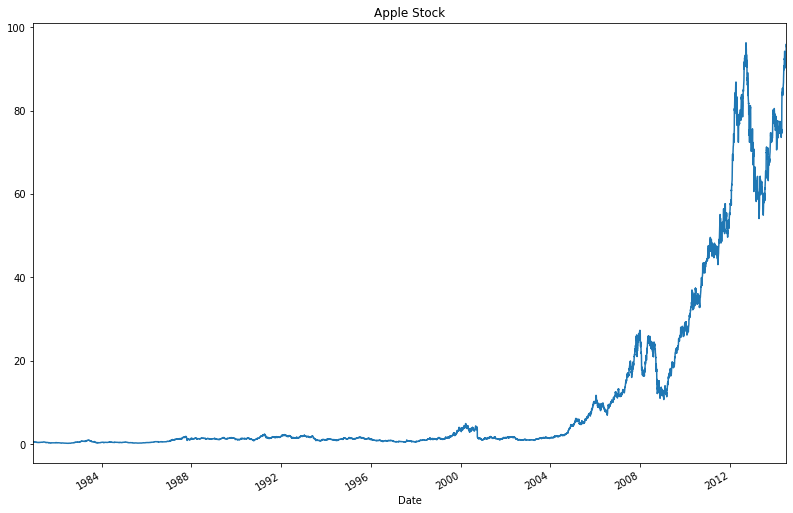

In [106]:
#Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

Now we will be leaarning to get financial data from a website and combine them into a dataframe for further processing

In [117]:
#First we have to ensure that the pandas_datareader package is installed
import pandas_datareader.data as web

#package for dates
import datetime as dt

In [108]:
#Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is)
start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

start

datetime.datetime(2015, 1, 1, 0, 0)

In [109]:
#Select the Apple, Tesla, Twitter, IBM, LinkedIn stocks symbols and assign them to a variable called stocks
stocks = ['AAPL', 'TSLA', 'IBM', 'LNKD']

In [119]:
#Read the data from Google and store it in df
df = web.DataReader(stocks, 'google', start, end)
df

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


Since the previous excercise didnt work out we willnow be moving onto the next excercise i.e the Investor Flow of Funds in the US 

In [120]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'
df = pd.read_csv(url)
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [121]:
#Setting the columns Date as the index
df = df.set_index('Date')
df.head(10)

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931
2013-01-09,14817,7995,6821,2888,9766,7311,2455,27471
2014-04-02,3155,938,2217,265,3379,3129,250,6799
2014-04-09,5761,2080,3681,1482,1609,1448,161,8852
2014-04-16,2286,634,1652,1186,633,604,29,4105


In [123]:
df.index

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

In [127]:
#Setting the index of the date column to datetime
df.index = pd.to_datetime(df.index)
df.head(10)

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931
2013-01-09,14817,7995,6821,2888,9766,7311,2455,27471
2014-04-02,3155,938,2217,265,3379,3129,250,6799
2014-04-09,5761,2080,3681,1482,1609,1448,161,8852
2014-04-16,2286,634,1652,1186,633,604,29,4105


In [128]:
#Change the frequency of values, sum them and pass them to monthly
monthly = df.resample('M').sum()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0
2013-05-31,0,0,0,0,0,0,0,0
2013-06-30,0,0,0,0,0,0,0,0
2013-07-31,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0


In [130]:
#Dropping the NAN columns
monthly = monthly.replace(0, np.nan)
monthly = monthly.dropna()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-31,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-04-30,10842.0,1048.0,9794.0,4931.0,8493.0,7193.0,1300.0,24267.0
2014-05-31,-2203.0,-8720.0,6518.0,3172.0,13767.0,10192.0,3576.0,14736.0
2014-06-30,2319.0,-6546.0,8865.0,4588.0,9715.0,7551.0,2163.0,16621.0
2014-07-31,-7051.0,-11128.0,4078.0,2666.0,7506.0,7026.0,481.0,3122.0
2014-08-31,1943.0,-5508.0,7452.0,1885.0,1897.0,-1013.0,2910.0,5723.0
2014-09-30,-2767.0,-6596.0,3829.0,1599.0,3984.0,2479.0,1504.0,2816.0
2014-11-30,-2753.0,-7239.0,4485.0,729.0,14528.0,11566.0,2962.0,12502.0


In [131]:
#We now change the frequency to Year
year = monthly.resample('AS-JAN').sum()
year.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-01-01,-26156.0,-23126.0,-3031.0,526.0,9848.0,12613.0,-2765.0,-15782.0
2013-01-01,3661.0,-1627.0,5288.0,2730.0,12149.0,9414.0,2735.0,18540.0
2014-01-01,330.0,-44689.0,45021.0,19570.0,59890.0,44994.0,14896.0,79787.0
2015-01-01,15049.0,-10459.0,25508.0,7280.0,26028.0,17986.0,8041.0,48357.0


We will now monve onto the next section i.e Deleting and the first dataset we will be moving onto is the IRIS dataset 

In [132]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)

iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [133]:
#Creating the columns of the dataset
iris.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [134]:
#Identfying if there is any missing values in the dataset
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [135]:
iris.iloc[10:29, 2:3] = np.nan
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [136]:
#Lets set the nan values to 1
iris = iris.replace(np.nan, 1)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [137]:
#Deleting the column class
del iris['class']

In [139]:
#Setting the first three rows as NAN
iris.iloc[0:3, :] = np.nan
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,5.0,3.6,1.4,0.2


In [140]:
iris = iris.dropna(how = 'any')
iris

,sepal_length,sepal_width,petal_length,petal_width
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
5,4.6,3.4,1.4,0.3
6,5.0,3.4,1.5,0.2
7,4.4,2.9,1.4,0.2
8,4.9,3.1,1.5,0.1
9,5.4,3.7,1.5,0.2
10,4.8,3.4,1.0,0.2
11,4.8,3.0,1.0,0.1
12,4.3,3.0,1.0,0.1


In [141]:
#Resetting the index so that it will start from 0
iris = iris.reset_index(drop=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.4,0.2
1,5.4,3.9,1.7,0.4
2,4.6,3.4,1.4,0.3
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2


In [142]:
#We will now move onto the wine dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [143]:
#Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns
wine = wine.drop(wine.columns[[0, 3, 6, 8, 10, 12, 13]], axis=1)
wine.head()

,14.23,1.71,15.6,127,3.06,2.29,1.04
0,13.20,1.78,11.2,100,2.76,1.28,1.05
1,13.16,2.36,18.6,101,3.24,2.81,1.03
2,14.37,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05


In [144]:
wine.columns = ['alcohol','malic_acid','alcalinity_of_ash','magnesium','flavanoids','proanthocyanins','hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,1.05
1,13.16,2.36,18.6,101,3.24,2.81,1.03
2,14.37,1.95,16.8,113,3.49,2.18,0.86
3,13.24,2.59,21.0,118,2.69,1.82,1.04
4,14.20,1.76,15.2,112,3.39,1.97,1.05


In [148]:
#Setting the values of the first 3 rows as NAN
wine.iloc[0:3, :] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,21.0,13.24,2.69,1.82,1.04
4,14.20,1.76,15.2,14.20,3.39,1.97,1.05


In [149]:
#Setting the values of magnesium of rows 3 & 4 as NAN
wine.iloc[3:5, 3:4] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,21.0,NaN,2.69,1.82,1.04
4,14.20,1.76,15.2,NaN,3.39,1.97,1.05


In [150]:
#Filling the value of NAN as 10 in alcohol and 100 in magnesium
wine['alcohol'] = wine['alcohol'].replace(np.nan, 10)
wine['magnesium'] = wine['magnesium'].replace(np.nan, 100)
wine.head(6)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,NaN,NaN,100.00,NaN,NaN,NaN
1,10.00,NaN,NaN,100.00,NaN,NaN,NaN
2,10.00,NaN,NaN,100.00,NaN,NaN,NaN
3,13.24,2.59,21.0,100.00,2.69,1.82,1.04
4,14.20,1.76,15.2,100.00,3.39,1.97,1.05
5,14.39,1.87,14.6,14.39,2.52,1.98,1.02


In [151]:
wine.isnull().sum()

alcohol              0
malic_acid           3
alcalinity_of_ash    3
magnesium            0
flavanoids           3
proanthocyanins      3
hue                  3
dtype: int64

In [160]:
#Generate random numbers
rand_num = np.random.randint(10, size=10)
rand_num

array([3, 1, 2, 2, 4, 1, 9, 4, 3, 5])

In [163]:
#Using the random numbers to assign values in the alcohol columns to NAN
wine.alcohol[rand_num] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,NaN,NaN,100.00,NaN,NaN,NaN
1,NaN,NaN,NaN,100.00,NaN,NaN,NaN
2,NaN,NaN,NaN,100.00,NaN,NaN,NaN
3,NaN,2.59,21.0,100.00,2.69,1.82,1.04
4,NaN,1.76,15.2,100.00,3.39,1.97,1.05
5,NaN,1.87,14.6,14.39,2.52,1.98,1.02
6,14.06,2.15,17.6,14.06,2.51,1.25,1.06
7,14.83,1.64,14.0,14.83,2.98,1.98,1.08
8,13.86,1.35,16.0,13.86,3.15,1.85,1.01
9,NaN,2.16,18.0,14.10,3.32,2.38,1.25


In [164]:
#Now we identofy the new missing value count
wine.isnull().sum()

alcohol              6
malic_acid           3
alcalinity_of_ash    3
magnesium            0
flavanoids           3
proanthocyanins      3
hue                  3
dtype: int64

In [165]:
#Deleting the rows that have NAN
wine = wine.dropna(axis=0, how='any')
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
6,14.06,2.15,17.6,14.06,2.51,1.25,1.06
7,14.83,1.64,14.0,14.83,2.98,1.98,1.08
8,13.86,1.35,16.0,13.86,3.15,1.85,1.01
10,14.12,1.48,16.8,14.12,2.43,1.57,1.17
11,13.75,1.73,16.0,13.75,2.76,1.81,1.15


In [166]:
#Resetting the index
wine = wine.reset_index(drop=True)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.06,2.15,17.6,14.06,2.51,1.25,1.06
1,14.83,1.64,14.0,14.83,2.98,1.98,1.08
2,13.86,1.35,16.0,13.86,3.15,1.85,1.01
3,14.12,1.48,16.8,14.12,2.43,1.57,1.17
4,13.75,1.73,16.0,13.75,2.76,1.81,1.15
5,14.75,1.73,11.4,14.75,3.69,2.81,1.25
6,14.38,1.87,12.0,14.38,3.64,2.96,1.20
7,13.63,1.81,17.2,13.63,2.91,1.46,1.28
8,14.30,1.92,20.0,14.30,3.14,1.97,1.07
9,13.83,1.57,20.0,13.83,3.40,1.72,1.13
